# Exceptions to the Buy American Act

## Overview

The following dataset was collected from the Federal Business Opportunities website, which is a searchable collection of federal contract opportunities. It includes information on contract requirements and awards. There is an additional dataset of information collected for the exceptions to the Buy American Act (BAA), signed by President Hoover in 1933. This act required the United States government to prefer purchases from American companies.

## Features

Features of the dataset include information about the funding agency, country origin, dates signed and completed, North American Industry Classification System information, product information, vendor information, and contract value information.

Exceptions to the BAA can provide interesting insight for a few reasons. How much federal money is spent outside of the United States? Are there any trends to this, in terms of which countries or industries? What agencies frequently appear on this list?

A few basic summary statistics and visualizations will tell us a little bit about the contracts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

buy = pd.read_excel('../../_Datasets/Buy_American_Act.xls')
new_col = ['Funding_Agency', 'Funding_Agency_ID',
       'Place_Manufacture_Desc',
       'Country_Origin_Code', 'PIID', 'Date_Signed',
       'Completion_Date', 'NAICS_Code', 'NAICS_Description',
       'Prod_Service_Code', 'Prod_Service_Desc',
       'Vendor_Name', 'Vendor_City', 'Vendor_State', 'Vendor_Country',
       'DUNS_No', 'Contract_Type', 'Award_IDV_Type',
       'Total_Contract_Val',
       'Action_Obligation']
buy.columns = new_col
buy.head(3)

,Funding_Agency,Funding_Agency_ID,Place_Manufacture_Desc,Country_Origin_Code,PIID,Date_Signed,Completion_Date,NAICS_Code,NAICS_Description,Prod_Service_Code,Prod_Service_Desc,Vendor_Name,Vendor_City,Vendor_State,Vendor_Country,DUNS_No,Contract_Type,Award_IDV_Type,Total_Contract_Val,Action_Obligation
0,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-08-30,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,0.00,6404.00
1,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2013-09-18,2013-09-30,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2047.70,2047.70
2,ADVISORY COUNCIL ON HISTORIC PRESERVATION,9530,MFG OUTSIDE U.S. - COMMERCIAL INFORMATION TECH...,JPN,INN10PD18370,2015-05-20,2014-08-31,333315.0,PHOTOGRAPHIC AND PHOTOCOPYING EQUIPMENT MANUFA...,7490,MISCELLANEOUS OFFICE MACHINES,SHARP ELECTRONICS CORPORATION,MAHWAH,NEW JERSEY,UNITED STATES,1818012,FIRM FIXED PRICE,DELIVERY ORDER,2587.52,2587.52


#### Notes: Table
Empty values and NaN do not seem to be a major issue when using the info() method. Vendor state has many missing values, but it is not likely critical for our questions. Without several numeric values, the describe() method won't tell much.

In [3]:
buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59535 entries, 0 to 59534
Data columns (total 20 columns):
Funding_Agency            59535 non-null object
Funding_Agency_ID         59535 non-null object
Place_Manufacture_Desc    59535 non-null object
Country_Origin_Code       59176 non-null object
PIID                      59535 non-null object
Date_Signed               59535 non-null datetime64[ns]
Completion_Date           59535 non-null datetime64[ns]
NAICS_Code                59502 non-null float64
NAICS_Description         59502 non-null object
Prod_Service_Code         59531 non-null object
Prod_Service_Desc         59531 non-null object
Vendor_Name               59526 non-null object
Vendor_City               59530 non-null object
Vendor_State              44843 non-null object
Vendor_Country            59463 non-null object
DUNS_No                   59535 non-null int64
Contract_Type             59463 non-null object
Award_IDV_Type            59535 non-null object
Total_Contr

### Notes: Uniques
Let's take a look at how many unique values exist for each feature to get an idea of how much variation the dataset holds.

In [43]:
for col in buy.columns:
    print("{}\n".format(str(col)), len(buy[col].unique())) # There is probably a built-in for this

Funding_Agency
 203
Funding_Agency_ID
 201
Place_Manufacture_Desc
 5
Country_Origin_Code
 192
PIID
 47275
Date_Signed
 1667
Completion_Date
 3266
NAICS_Code
 713
NAICS_Description
 704
Prod_Service_Code
 565
Prod_Service_Desc
 571
Vendor_Name
 7132
Vendor_City
 2743
Vendor_State
 54
Vendor_Country
 105
DUNS_No
 6788
Contract_Type
 14
Award_IDV_Type
 4
Total_Contract_Val
 40740
Action_Obligation
 40901


C:\Users\seapea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


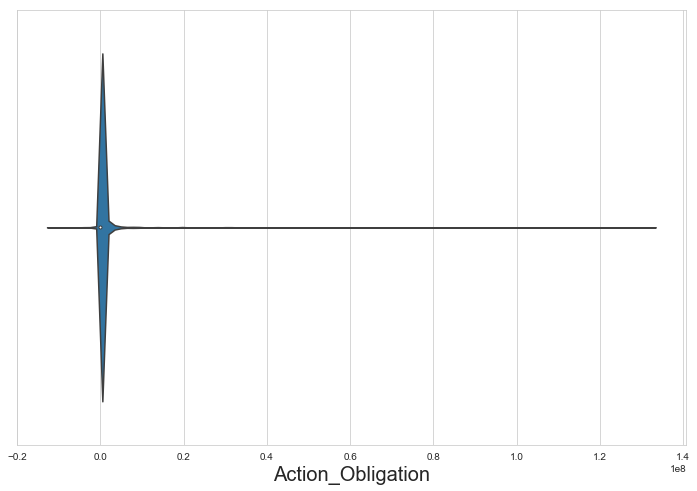

count    5.953500e+04
mean     6.371874e+04
std      1.175886e+06
min     -1.255044e+07
25%      3.101250e+02
50%      4.955000e+03
75%      1.802800e+04
max      1.331093e+08
Name: Action_Obligation, dtype: float64


In [86]:
plt.figure(figsize=(12,8))
sns.violinplot(x=buy['Action_Obligation'])
plt.xlabel('Action_Obligation', size=20)
plt.show()
print(buy['Action_Obligation'].describe())

#### Notes: Violin plot
The violinplot above is not doing a good job of telling us much. The count around zero is overwhelmingly large. Very large outliers are likely skewing the information and spreading out the values too much for insight. The describe() method trick on this column confirms this is the case.

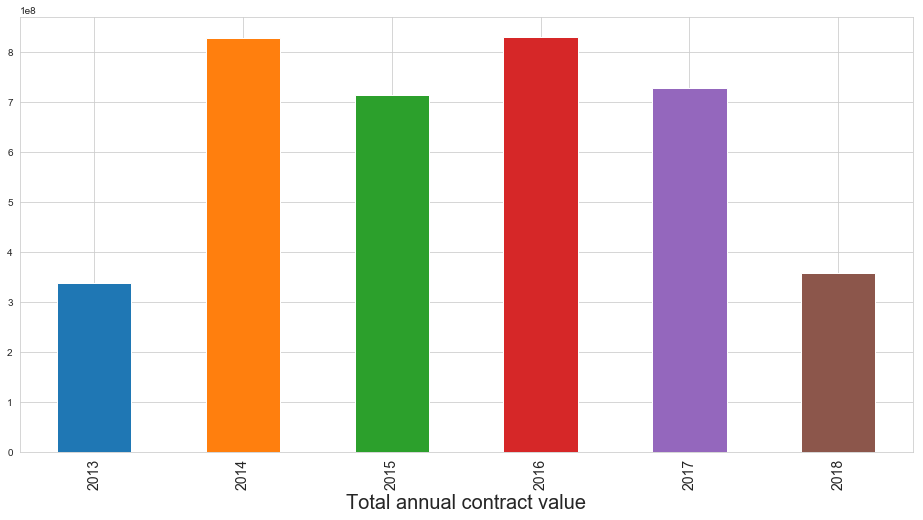

In [7]:
date_val = pd.DataFrame(buy[['Action_Obligation', 'Date_Signed']])
date_val.index = date_val['Date_Signed']
del date_val['Date_Signed']
dateval_ser = date_val['Action_Obligation']
plt.figure(figsize=(16,8))
dateval_ser.resample('Y').sum().plot(kind='bar')
plt.xlabel('Total annual contract value', size=20)
plt.xticks(np.arange(6), ('2013', '2014', '2015', '2016', '2017', '2018'), size=14)
plt.show()

#### Notes: Bar plot
We can take the annual sum of total contract action obligations to see if there are major spending differences over time or obvious spikes. The first and last year of contracts are not for complete 12-month cycles, therefore we can expect their total spendings to be considerably less, as queried below.

In [97]:
print(min(buy['Date_Signed']), max(buy['Date_Signed']))

2013-08-01 00:00:00 2018-07-31 00:00:00


## Deeper questions

As mentioned, the vast majority of this dataset revolves around categorical variables, such as agency, origin country, or product description. These features will provide the most information about the exceptions to this federal spending law. 

This report will pose three general questions about the data and its trends. During the analysis of the features, these questions will be refined to try and discover more specific information. 

1. Are some foreign countries much more prevalent on this list? Is the reason obvious?
2. Do any federal agencies consistently appear on the list to award contracts overseas?
3. What can we learn about the industries and companies awarded on this list? 

#### Are some foreign countries much more prevalent on this list? Is the reason obvious?

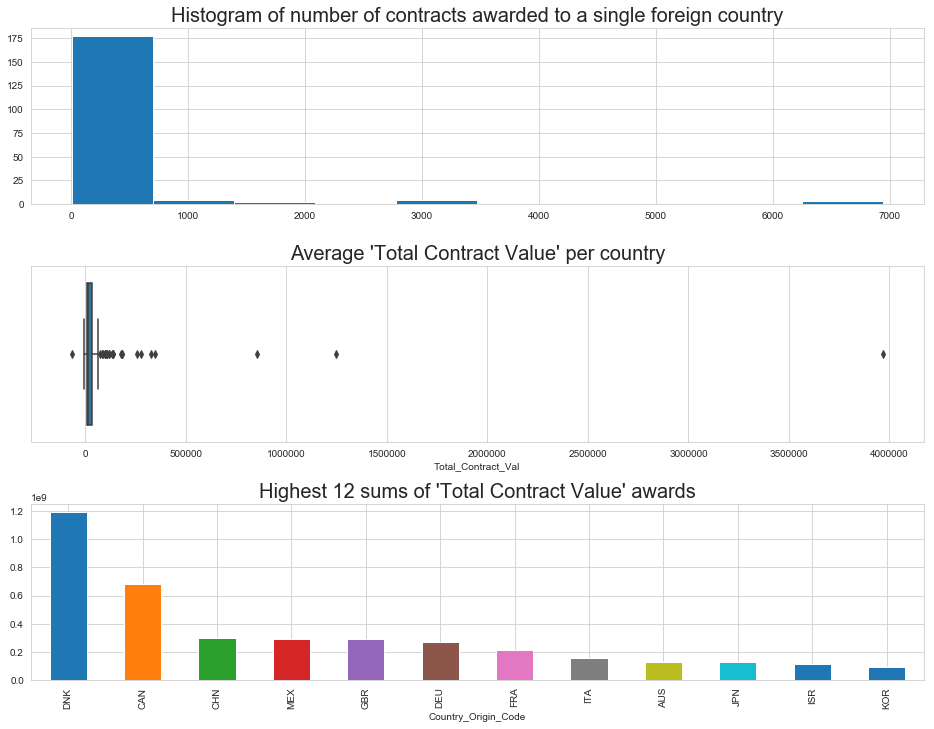

CHN    0.116654
MEX    0.107281
CAN    0.105367
FRA    0.079768
JPN    0.058117
DEU    0.056320
GBR    0.049416
KOR    0.048929
TWN    0.033191
ZAF    0.023868
CHE    0.022625
IND    0.022491
Name: Country_Origin_Code, dtype: float64 

Number of contracts awarded by count


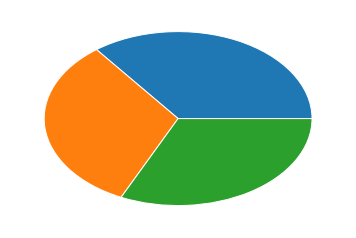

In [28]:
plt.figure(figsize=(16,12))
plt.subplot(311)
plt.hist(buy['Country_Origin_Code'].value_counts())
plt.title('Histogram of number of contracts awarded to a single foreign country', size=20)
plt.subplot(312)
sns.boxplot(buy.groupby('Country_Origin_Code')['Total_Contract_Val'].mean())
plt.title("Average 'Total Contract Value' per country", size=20)
plt.subplot(313)
buy.groupby('Country_Origin_Code')['Total_Contract_Val'].sum().sort_values(ascending=False)[:12].plot(kind='bar')
plt.title("Highest 12 sums of 'Total Contract Value' awards", size=20)
plt.subplots_adjust(hspace=0.35)
plt.show()
plt.pie(buy['Country_Origin_Code'].value_counts()[:3] / buy['Country_Origin_Code'].value_counts().shape[0])
print(buy['Country_Origin_Code'].value_counts()[:12] / buy.shape[0], '\n\nNumber of contracts awarded by count')

#### Notes: Visualizations
The first visualization is merely a histogram of the total number of contracts awarded to a foreign country. It appears that the vast majority of countries (around 175) receive 700 or fewer.

The second visualization is a boxplot, or interquartile representation with outliers, of average contract values. To know more about the right outliers, we can look at the final graph and summary statistic.

With the barplot at the bottom, we can see how much federal money for contracts was award to the highest 12 foreign countries in total. This provides some insight when we compare the nations to the list of the top 12 awarded countries, simply by count. Taiwan, South Africa, Switzerland, and India are on the list with a *high* number of contracts without making the Total Contract Value list. Denmark, Israel, Italy, and Australia make the list of *very high Total Contract Value while not appearing on the most frequent list*. Their average contract value must be higher, indicating they are right outliers on the second visualization.
#### What can we learn about the industries and companies awarded on this list?

In [42]:
contractsum_country = pd.DataFrame(buy.pivot_table(
    index=['Prod_Service_Desc', 'Country_Origin_Code'], aggfunc=sum)['Total_Contract_Val']).unstack()
print(contractsum_country.head())

Total_Contract_Val          \
Country_Origin_Code                                               ABW     AFG   
Prod_Service_Desc                                                               
ABRASIVE MATERIALS                                                NaN     NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY                  NaN     NaN   
ACCOUNTING AND CALCULATING MACHINES                               NaN     NaN   
ADHESIVES                                                         NaN     NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN...                NaN  7386.0   

                                                                              \
Country_Origin_Code                                AGO AIA ALB       ARE ARG   
Prod_Service_Desc                                                              
ABRASIVE MATERIALS                                 NaN NaN NaN       NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN  13663.37 NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN       NaN NaN   
ADHESIVES                                          NaN NaN NaN       NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN       NaN NaN   

                                                                   ...      \
Country_Origin_Code                                ARM     ASM ATF ... VEN   
Prod_Service_Desc                                                  ...       
ABRASIVE MATERIALS                                 NaN     NaN NaN ... NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN     NaN NaN ... NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN  9195.0 NaN ... NaN   
ADHESIVES                                          NaN     NaN NaN ... NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN     NaN NaN ... NaN   

                                                                            \
Country_Origin_Code                                VGB VNM WSM XKS XQZ YEM   
Prod_Service_Desc                                                            
ABRASIVE MATERIALS                                 NaN NaN NaN NaN NaN NaN   
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN NaN NaN NaN   
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN NaN NaN NaN   
ADHESIVES                                          NaN NaN NaN NaN NaN NaN   
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN NaN NaN NaN   

                                                                
Country_Origin_Code                                ZAF ZMB ZWE  
Prod_Service_Desc                                               
ABRASIVE MATERIALS                                 NaN NaN NaN  
ACCESSORIES FOR SECONDARY METALWORKING MACHINERY   NaN NaN NaN  
ACCOUNTING AND CALCULATING MACHINES                NaN NaN NaN  
ADHESIVES                                          NaN NaN NaN  
ADP CENTRAL PROCESSING UNIT (CPU, COMPUTER), AN... NaN NaN NaN  

[5 rows x 191 columns]

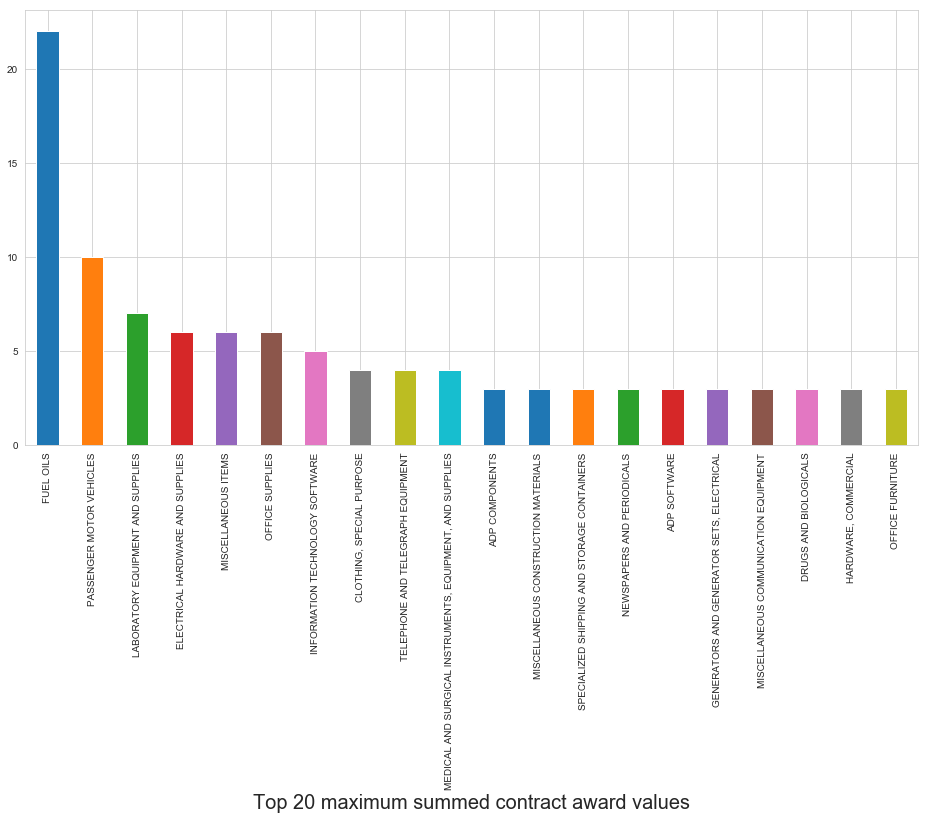

In [71]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=120) # Not quite working yet
contractsum_country.idxmax().value_counts()[:20].plot(kind='bar')
plt.xlabel('Top 20 maximum summed contract award values', size=20)
plt.show()

In [ ]:
buy.groupby('Contract')

In [33]:
buy[buy['Prod_Service_Desc'] == 'FUEL OILS']['Total_Contract_Val'].sum()

34034899.510000005

In [60]:
(buy['Completion_Date'] - buy['Date_Signed']).describe()

count                       59535
mean      27 days 01:41:13.469387
std      500 days 11:53:49.886936
min          -4693 days +00:00:00
25%              12 days 00:00:00
50%              44 days 00:00:00
75%             120 days 00:00:00
max           33243 days 00:00:00
dtype: object